# На природу, в лес к деревьям! 

- Используя деревья можно решать задачу классификации
- А можно регрессии 
- Можно даже использовать деревья для ранжирования и поиска аномалии

Сами по себе деревья редко используют как самодостаточные алгоритмы. Чаще всего их объединяют в композиции: случайный лес, градиентный бустинг. 

## История ML:

1. 50-е годы - появляются нейронные сети 
2. конец 70-х - первая зима искусственного интеллекта (развитие экспертных систем) 
3. 80-е годы - появился алгоритм обратного распространения ошибки, появилось несколько новых архитектур => бабло снова полилось рекой в искусственный интеллект 
4. 90-е годы - вторая зима искусственного интеллекта (развитие классических методов машинного обучения: SVM, деревья, бустинг и тп 
5. серидина 2000-х - третий ренесанс нейронных сетей

## 1. Одинокий дуб своими руками для регрессии 

-> Случайный лес 

Строим много деревьев, пытаемся сделать их максимально независимыми друг от друга. А решение принимаем, в результате усреднения прогнозов.

1. Беру случайную подвыборку моей исходной выборки

   - беру случайное подмножество объясняющих переменных ($\sqrt{k}$, $\frac{k}{3}$) (без повторений)
   - беру случайное подмножество наблюдений с повторениями 
   
2. Обучаю на каждой подвыборке дерево 
3. Использую каждое дерево для прогнозирования, а дальше ищу средний прогноз по всем деревьям

Для классификации всё абсолютно то же самое, но в качестве критерия для разбиения вершины на две части используется либо энтропия, либо индекс Джини.  $\Rightarrow$ посмотрите видос ББ.

# 2. Подгружаем покемонов!

In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/dap_2020_fall/master/sem12_13_logisticRegression/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [37]:
from sklearn.model_selection import train_test_split

predictors = ['attack', 'defense', 'speed']
X = df[predictors]
y = df['is_legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=777)

In [44]:
df[predictors]

,attack,defense,speed
0,49,49,45
1,62,63,60
2,100,123,80
3,52,43,65
4,64,58,80
...,...,...,...
796,101,103,61
797,181,131,109
798,101,53,43
799,107,101,79


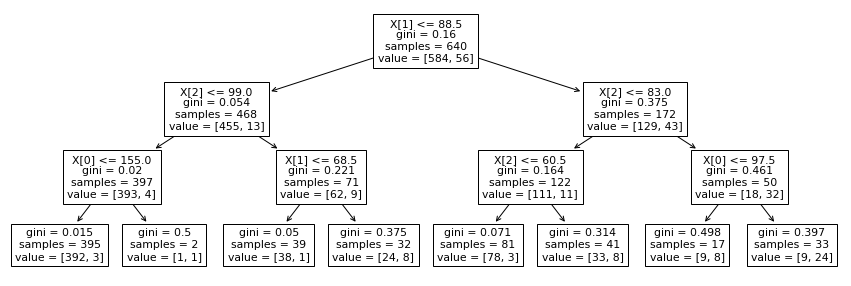

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz

model_t = DecisionTreeClassifier(max_depth=3)
model_t.fit(X_train, y_train)

plt.figure(figsize=(15,5))
plot_tree(model_t);

Посмотрим как дерево переобучается. 

In [22]:
from sklearn.metrics import roc_auc_score

model_t = DecisionTreeClassifier(max_depth=5)
model_t.fit(X_train, y_train)

p_hat = model_t.predict_proba(X_train)[:,-1]
roc_auc_score(y_train, p_hat)

0.9765166340508806

In [23]:
p_hat = model_t.predict_proba(X_test)[:,-1]
roc_auc_score(y_test, p_hat)

0.8284742468415938

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
p_hat = model_rf.predict_proba(X_train)[:,-1]
roc_auc_score(y_train, p_hat)

0.9999847113502935

In [26]:
p_hat = model_rf.predict_proba(X_test)[:,-1]
roc_auc_score(y_test, p_hat)

0.9312439261418852

Случайный лес никогда не переобучается. 

__Кросс-валидация__

In [31]:
from sklearn.model_selection import cross_validate

model_rf = RandomForestClassifier(n_estimators=100)

cv_results_tree = cross_validate(model_rf , X, y, cv=5, scoring='roc_auc')
cv_results_tree['test_score']

array([0.85811467, 0.94422701, 0.9214775 , 0.86105675, 0.70914873])

In [32]:
cv_results_tree['test_score'].mean()

0.8588049309743466

__Перебор параметров по решётке__

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entrioy'],
    'min_samples_leaf': [5, 7, 10]
}

clf_forest = RandomForestClassifier()

clf_grid = GridSearchCV(
    estimator=clf_forest, 
    param_grid=parameters, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs=-1
)

clf_grid.fit(X_train, y_train)
print('Лучший результат:', clf_grid.best_score_)
print('Лучшие параметры:', clf_grid.best_params_)

Лучший результат: 0.8954163652439515
Лучшие параметры: {'criterion': 'gini', 'min_samples_leaf': 7}


In [35]:
clf_grid.best_estimator_

RandomForestClassifier(min_samples_leaf=7)

In [36]:
p_hat = clf_grid.predict_proba(X_test)[:,-1]
roc_auc_score(y_test, p_hat)

0.9319727891156463